# Maverick.io Challenge

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import KFold,cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from sklearn.metrics import precision_score, recall_score, accuracy_score
%matplotlib inline

Using TensorFlow backend.


## Importing the dataset

In [2]:
data = pd.read_csv('train.csv')

## Exploratory Data Analysis

In [4]:
data.head(10)

Heigh_From_Sea_Level  Aspect  Slope  Distance_To_Water_Source  \
0                  2984      87     10                       234   
1                  3021     283     31                       630   
2                  3357     164     14                       618   
3                  2787     272     16                       150   
4                  3011     135      2                       576   
5                  3063     302     13                       379   
6                  2813     272     13                        30   
7                  3169     337     23                       255   
8                  3589       1     20                       430   
9                  2753     180      9                       108   

   Standing_Distance_To_Water_Source  Distance_To_Road  Shadow_In_Morning  \
0                                 62              3700                235   
1                                372              2155                122   
2                                151              1410                232   
3                                 40              2024                176   
4                                 95              5550                222   
5                                 38              2648                183   
6                                  4              1355                186   
7                                 95              1047                164   
8                                177              3017                188   
9                                 -4              1878                224   

   Shadow_In_Midday  Shadow_In_Evening  Distance_To_Fire  Turf  \
0             224.0                119              2751    29   
1             224.0                234              1519    13   
2             244.0                140              1866    32   
3             243.0                206               957    31   
4             238.0                151              1524    29   
5             234.0                190              1307    31   
6             244.0                197              1795     4   
7             202.0                173              2016    29   
8             200.0                146              1484    40   
9             246.0                155              2571    30   

   Neighbourhood_Type     Plant_Type  
0                   1  Assassin vine  
1                   3  Assassin vine  
2                   3       Ascomoid  
3                   3  Assassin vine  
4                   1  Assassin vine  
5                   3  Assassin vine  
6                   3       Ascomoid  
7                   1       Ascomoid  
8                   1       Ascomoid  
9                   1  Assassin vine

### Checking for Null Values
#### Only one column has null values

In [5]:
data.isnull().sum()

Heigh_From_Sea_Level                     0
Aspect                                   0
Slope                                    0
Distance_To_Water_Source                 0
Standing_Distance_To_Water_Source        0
Distance_To_Road                         0
Shadow_In_Morning                        0
Shadow_In_Midday                     93033
Shadow_In_Evening                        0
Distance_To_Fire                         0
Turf                                     0
Neighbourhood_Type                       0
Plant_Type                               0
dtype: int64

### Checking to see the correlation between independent variables
#### Data is highly correlated 

In [6]:
data[1:1000].corr()

Heigh_From_Sea_Level    Aspect     Slope  \
Heigh_From_Sea_Level                           1.000000  0.075212 -0.265559   
Aspect                                         0.075212  1.000000  0.098275   
Slope                                         -0.265559  0.098275  1.000000   
Distance_To_Water_Source                       0.319665  0.050820 -0.024341   
Standing_Distance_To_Water_Source              0.097490  0.077313  0.260459   
Distance_To_Road                               0.329756  0.042363 -0.248485   
Shadow_In_Morning                              0.091860 -0.597810 -0.342853   
Shadow_In_Midday                               0.202155  0.373367 -0.501387   
Shadow_In_Evening                              0.073337  0.662541 -0.114426   
Distance_To_Fire                               0.144674 -0.177348 -0.208177   
Turf                                           0.682200  0.018432 -0.124376   
Neighbourhood_Type                            -0.331402  0.137956  0.297106   

                                   Distance_To_Water_Source  \
Heigh_From_Sea_Level                               0.319665   
Aspect                                             0.050820   
Slope                                             -0.024341   
Distance_To_Water_Source                           1.000000   
Standing_Distance_To_Water_Source                  0.602950   
Distance_To_Road                                   0.085611   
Shadow_In_Morning                                 -0.026081   
Shadow_In_Midday                                   0.060323   
Shadow_In_Evening                                  0.055023   
Distance_To_Fire                                   0.066055   
Turf                                               0.190906   
Neighbourhood_Type                                 0.015833   

                                   Standing_Distance_To_Water_Source  \
Heigh_From_Sea_Level                                        0.097490   
Aspect                                                      0.077313   
Slope                                                       0.260459   
Distance_To_Water_Source                                    0.602950   
Standing_Distance_To_Water_Source                           1.000000   
Distance_To_Road                                           -0.011050   
Shadow_In_Morning                                          -0.197728   
Shadow_In_Midday                                           -0.095017   
Shadow_In_Evening                                           0.084831   
Distance_To_Fire                                           -0.060527   
Turf                                                        0.050962   
Neighbourhood_Type                                          0.120935   

                                   Distance_To_Road  Shadow_In_Morning  \
Heigh_From_Sea_Level                       0.329756           0.091860   
Aspect                                     0.042363          -0.597810   
Slope                                     -0.248485          -0.342853   
Distance_To_Water_Source                   0.085611          -0.026081   
Standing_Distance_To_Water_Source         -0.011050          -0.197728   
Distance_To_Road                           1.000000           0.014480   
Shadow_In_Morning                          0.014480           1.000000   
Shadow_In_Midday                           0.206880          -0.069249   
Shadow_In_Evening                          0.120194          -0.817865   
Distance_To_Fire                           0.275640           0.191489   
Turf                                       0.201534           0.032084   
Neighbourhood_Type                        -0.446564          -0.226392   

                                   Shadow_In_Midday  Shadow_In_Evening  \
Heigh_From_Sea_Level                       0.202155           0.073337   
Aspect                                     0.373367           0.662541   
Slope                                     -0.501387          -0.1

### Using seaborn for better visualisation of the correlation matrix

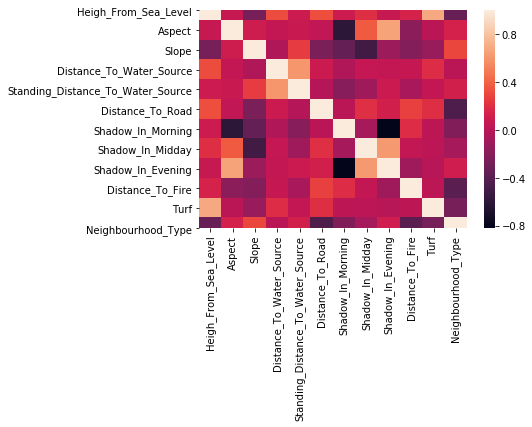

In [7]:
sns.heatmap(data[:1000].corr())

### Encoding the Target/Dependent variable to have numeric categories, ML algorithms prefer numeric target variables

In [8]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
data['code'] = LE.fit_transform(data['Plant_Type'])

#### Checking to see our encoders performance

In [9]:
data['code'].value_counts()

1    226705
0    169487
2     28488
6     16416
5     13931
4      7598
3      2184
Name: code, dtype: int64

### Perfect!
#### And as we can infer from this class distribution there is a huge class imbalance - not a very good data set.

In [10]:
data['Plant_Type'].value_counts()

Assassin vine    226705
Ascomoid         169487
Basidirond        28488
Myconid:          16416
Kelpie            13931
Hangman tree       7598
Dark tree          2184
Name: Plant_Type, dtype: int64

### Now again plotting the correlation matrix to see the correlation of independent variables with the target(code)
#### We can infer from this plot that column "Shadow_In_Midday" has a considerable correlation with the target, we cannot just simply drop it

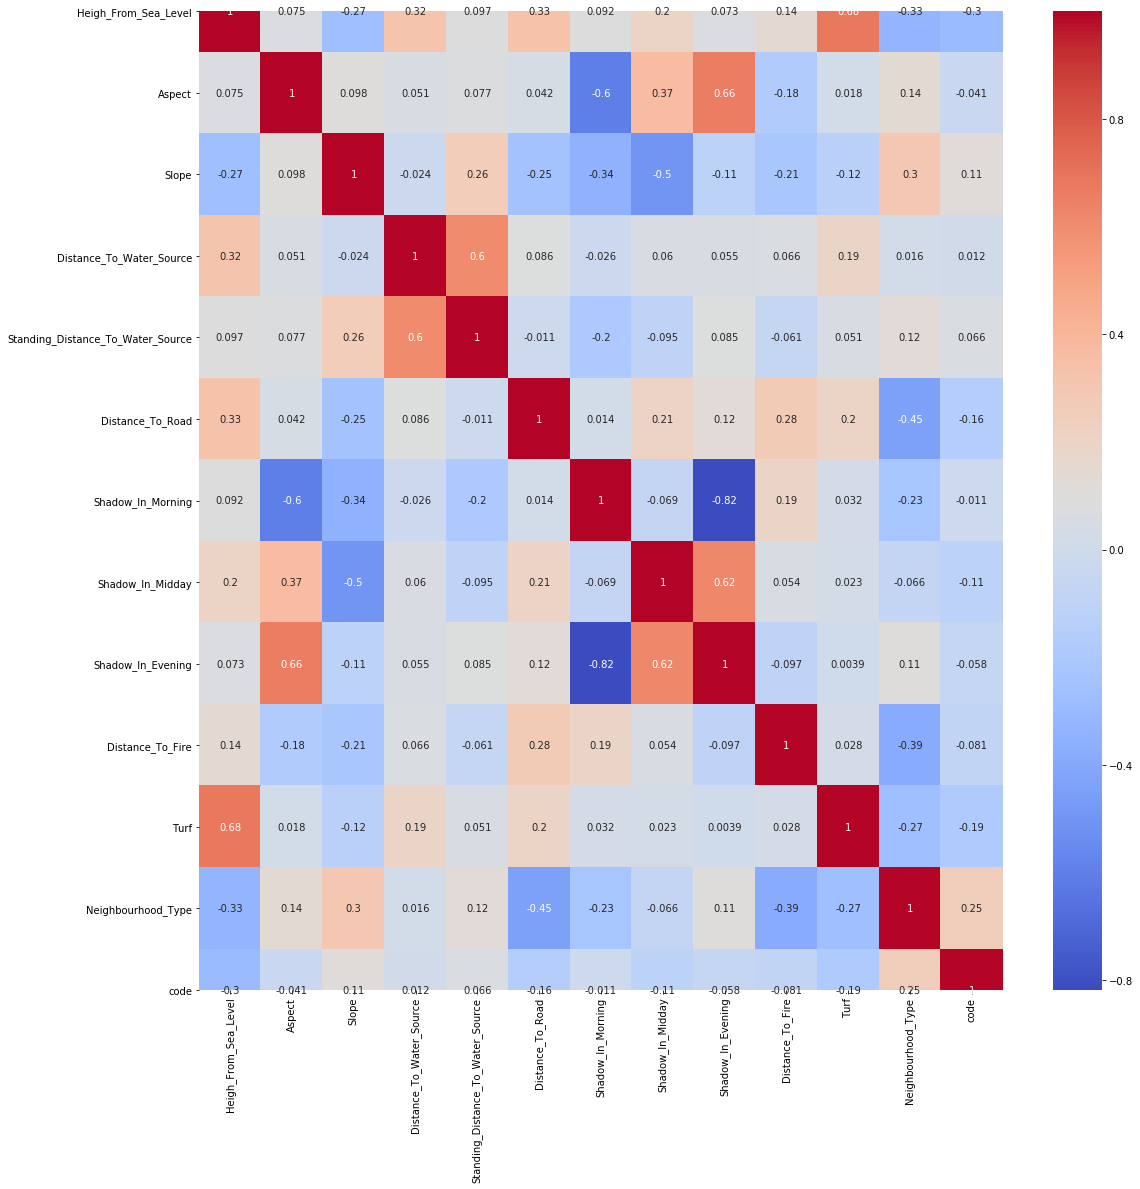

In [11]:
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(data[1:1000].corr(), ax=ax, annot= True,cmap='coolwarm')

### We will apply a different strategy of filling the null values with the mean of the column. 

In [12]:
data['Shadow_In_Midday'].fillna(data['Shadow_In_Midday'].mean(), inplace = True)

### Checking to see if we did it correctly 
#### Yes!

In [13]:
data['Shadow_In_Midday'].isnull().sum()

0

In [14]:
data.isna().sum()

Heigh_From_Sea_Level                 0
Aspect                               0
Slope                                0
Distance_To_Water_Source             0
Standing_Distance_To_Water_Source    0
Distance_To_Road                     0
Shadow_In_Morning                    0
Shadow_In_Midday                     0
Shadow_In_Evening                    0
Distance_To_Fire                     0
Turf                                 0
Neighbourhood_Type                   0
Plant_Type                           0
code                                 0
dtype: int64

### Checking the distributions of the indepent variables

In [15]:
data.describe()

Heigh_From_Sea_Level         Aspect          Slope  \
count         464809.000000  464809.000000  464809.000000   
mean            2959.483063     155.661235      14.099759   
std              279.781777     111.919973       7.486816   
min             1859.000000       0.000000       0.000000   
25%             2809.000000      58.000000       9.000000   
50%             2996.000000     127.000000      13.000000   
75%             3163.000000     261.000000      18.000000   
max             3858.000000     360.000000      65.000000   

       Distance_To_Water_Source  Standing_Distance_To_Water_Source  \
count             464809.000000                      464809.000000   
mean                 269.290644                          46.390412   
std                  212.411427                          58.240912   
min                    0.000000                        -173.000000   
25%                  108.000000                           7.000000   
50%                  218.000000                          30.000000   
75%                  384.000000                          69.000000   
max                 1390.000000                         601.000000   

       Distance_To_Road  Shadow_In_Morning  Shadow_In_Midday  \
count     464809.000000      464809.000000     464809.000000   
mean        2351.779462         212.157323        223.311841   
std         1559.868239          26.775574         17.658200   
min            0.000000           0.000000          0.000000   
25%         1106.000000         198.000000        217.000000   
50%         1998.000000         218.000000        223.311841   
75%         3331.000000         231.000000        234.000000   
max         7117.000000         254.000000        254.000000   

       Shadow_In_Evening  Distance_To_Fire           Turf  Neighbourhood_Type  \
count      464809.000000     464809.000000  464809.000000       464809.000000   
mean          142.518338       1980.473990      24.370455            2.113563   
std            38.273670       1325.289344       9.478907            1.061051   
min             0.000000          0.000000       1.000000            1.000000   
25%           119.000000       1024.000000      20.000000            1.000000   
50%           143.000000       1710.000000      29.000000            2.000000   
75%           168.000000       2550.000000      31.000000            3.000000   
max           254.000000       7173.000000      40.000000            4.000000   

                code  
count  464809.000000  
mean        1.051563  
std         1.397023  
min         0.000000  
25%         0.000000  
50%         1.000000  
75%         1.000000  
max         6.000000

### Visualizing it with a box plot
#### We have a lot of outliers 

(464809, 14)

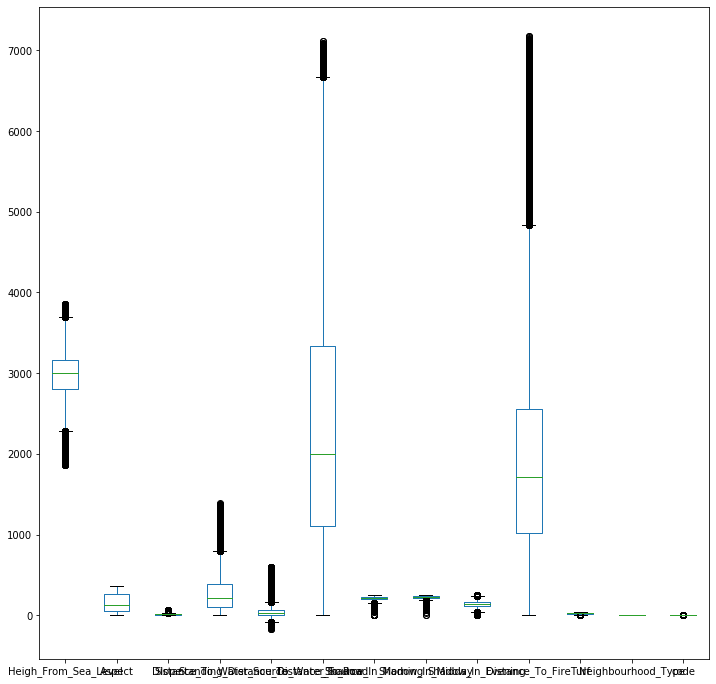

In [16]:
data.plot(kind='box',figsize = ((12,12)))
data.shape

### Removing the outliers that fall outside of our interquantile range
#### We are still left with a lot of data

In [17]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape

Heigh_From_Sea_Level                  354.0
Aspect                                203.0
Slope                                   9.0
Distance_To_Water_Source              276.0
Standing_Distance_To_Water_Source      62.0
Distance_To_Road                     2225.0
Shadow_In_Morning                      33.0
Shadow_In_Midday                       17.0
Shadow_In_Evening                      49.0
Distance_To_Fire                     1526.0
Turf                                   11.0
Neighbourhood_Type                      2.0
code                                    1.0
dtype: float64


(334598, 14)

### Checking to see if we did it correctly
#### Yes, almost all the outliers are removed 

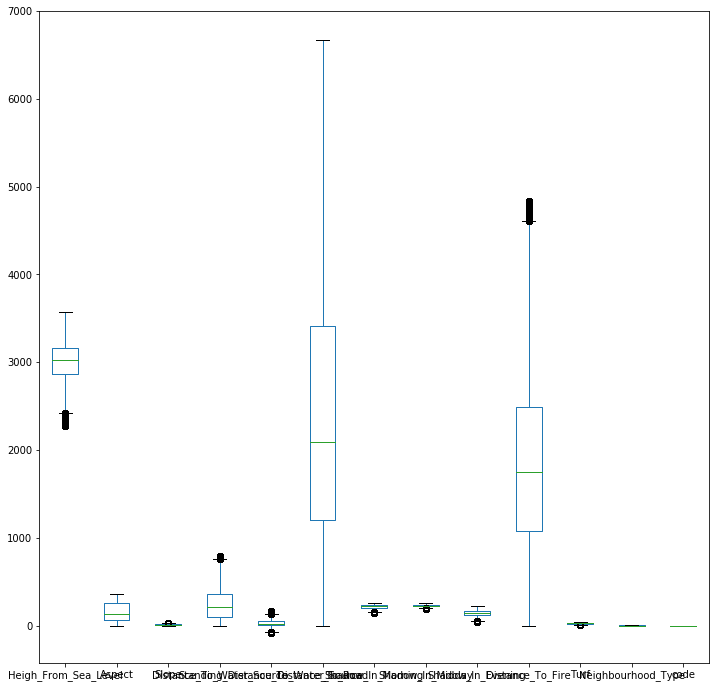

In [18]:
data.plot(kind='box',figsize = (12,12))

### Seperating the independent and the target variable 

In [19]:
X = data.drop(['Plant_Type','code'], axis = 1)
y = data['code']

### Just checking to see how a random ML algorithm would perform at this point 

In [20]:
kfold = KFold(n_splits=3)
results_kfold = cross_val_score(GaussianNB(), X[1:10000], y[1:10000], cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 68.70%


### Scaling the variables so that some of the data points don't overshadow the others while training the models

In [21]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

### Dividing into train/test data for validation purposes - better approach is always to use KFold CV, LOOCV for this purpose but due to limited computational power using simple train/test split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Artificial Neural Network
### Sequential  Model with 12 variables and 7 different output classes according to the data set. Also added hidden layers   for better performance, using softmax in the end because it is a multiclass classification problem. Loss function is catagorical cross entropy function, again because it is a multiclass classification problem. 

In [192]:
model = Sequential()
model.add(Dense(12, activation='relu'))
model.add(Dense(units=10,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=10,activation='relu'))
model.add(Dense(units=10,activation='relu'))
model.add(Dense(7, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'],n_jobs = -1)
estimator = KerasClassifier(build_fn=baseline_model, epochs=20, batch_size=100, verbose=1)
estimator.fit(X_train,y_train)
estimator.score(X_test, y_test)

Train on 238347 samples
Epoch 1/20
238347/238347 [==============================] - 10s 42us/sample - loss: 0.5098 - accuracy: 0.7609
Epoch 2/20
238347/238347 [==============================] - 9s 39us/sample - loss: 0.4556 - accuracy: 0.7904
Epoch 3/20
238347/238347 [==============================] - 10s 40us/sample - loss: 0.4357 - accuracy: 0.8021
Epoch 4/20
238347/238347 [==============================] - 9s 38us/sample - loss: 0.4219 - accuracy: 0.8088
Epoch 5/20
238347/238347 [==============================] - 9s 38us/sample - loss: 0.4115 - accuracy: 0.8134
Epoch 6/20
238347/238347 [==============================] - 9s 38us/sample - loss: 0.4029 - accuracy: 0.8174
Epoch 7/20
238347/238347 [==============================] - 9s 38us/sample - loss: 0.3962 - accuracy: 0.8196
Epoch 8/20
238347/238347 [==============================] - 9s 37us/sample - loss: 0.3905 - accuracy: 0.8225
Epoch 9/20
238347/238347 [==============================] - 10s 40us/sample - loss: 0.3861 - accuracy:

0.8416265

### Hyperparameter Tuning 
#### Doing it on just 1000 instances and a limited set of hyperparameters - lack of computational power. Anyway we get the idea on which parameters work better for this data set.  We can apply those to the actual model. Though it is always better to do this on the whole data set. 

In [185]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=20, batch_size=100, verbose=1)
batch_size = [80, 100, 150, 180,200]
epochs = [10, 20 , 30]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=3, verbose = 3)
grid_result = grid.fit(X_train[1:1000], Y_train[1:1000])

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] batch_size=80, epochs=10 ........................................
Train on 666 samples
Epoch 1/10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


666/666 [==============================] - 1s 2ms/sample - loss: 1.2273 - accuracy: 0.4399
Epoch 2/10
666/666 [==============================] - 0s 76us/sample - loss: 1.0237 - accuracy: 0.4535
Epoch 3/10
666/666 [==============================] - 0s 76us/sample - loss: 0.9069 - accuracy: 0.4715
Epoch 4/10
666/666 [==============================] - 0s 74us/sample - loss: 0.8416 - accuracy: 0.5090
Epoch 5/10
666/666 [==============================] - 0s 58us/sample - loss: 0.8055 - accuracy: 0.5405
Epoch 6/10
666/666 [==============================] - 0s 77us/sample - loss: 0.7826 - accuracy: 0.5375
Epoch 7/10
666/666 [==============================] - 0s 78us/sample - loss: 0.7641 - accuracy: 0.5450
Epoch 8/10
666/666 [==============================] - 0s 76us/sample - loss: 0.7528 - accuracy: 0.5526
Epoch 9/10
666/666 [==============================] - 0s 78us/sample - loss: 0.7441 - accuracy: 0.5541
Epoch 10/10
666/666 [==============================] - 0s 93us/sample - loss: 0.7381 

[CV] ............ batch_size=80, epochs=10, score=0.562, total=   2.3s
[CV] batch_size=80, epochs=10 ........................................
Train on 666 samples
Epoch 1/10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


666/666 [==============================] - 1s 2ms/sample - loss: 1.1043 - accuracy: 0.3574
Epoch 2/10
666/666 [==============================] - 0s 69us/sample - loss: 0.9949 - accuracy: 0.4775
Epoch 3/10
666/666 [==============================] - 0s 56us/sample - loss: 0.9170 - accuracy: 0.4865
Epoch 4/10
666/666 [==============================] - 0s 67us/sample - loss: 0.8597 - accuracy: 0.5330
Epoch 5/10
666/666 [==============================] - 0s 76us/sample - loss: 0.8168 - accuracy: 0.5631
Epoch 6/10
666/666 [==============================] - 0s 55us/sample - loss: 0.7860 - accuracy: 0.5811
Epoch 7/10
666/666 [==============================] - 0s 70us/sample - loss: 0.7639 - accuracy: 0.5766
Epoch 8/10
666/666 [==============================] - 0s 73us/sample - loss: 0.7474 - accuracy: 0.5886
Epoch 9/10
666/666 [==============================] - 0s 65us/sample - loss: 0.7361 - accuracy: 0.5781
Epoch 10/10
666/666 [==============================] - 0s 91us/sample - loss: 0.7280 

[CV] ............ batch_size=80, epochs=10, score=0.556, total=   2.2s
[CV] batch_size=80, epochs=10 ........................................
Train on 666 samples
Epoch 1/10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.4s remaining:    0.0s


666/666 [==============================] - 1s 2ms/sample - loss: 1.0360 - accuracy: 0.4354
Epoch 2/10
666/666 [==============================] - 0s 53us/sample - loss: 0.9538 - accuracy: 0.4474
Epoch 3/10
666/666 [==============================] - 0s 64us/sample - loss: 0.8930 - accuracy: 0.4760
Epoch 4/10
666/666 [==============================] - 0s 63us/sample - loss: 0.8428 - accuracy: 0.5060
Epoch 5/10
666/666 [==============================] - 0s 65us/sample - loss: 0.8028 - accuracy: 0.5556
Epoch 6/10
666/666 [==============================] - 0s 67us/sample - loss: 0.7766 - accuracy: 0.5706
Epoch 7/10
666/666 [==============================] - 0s 60us/sample - loss: 0.7598 - accuracy: 0.5691
Epoch 8/10
666/666 [==============================] - 0s 61us/sample - loss: 0.7471 - accuracy: 0.5751
Epoch 9/10
666/666 [==============================] - 0s 70us/sample - loss: 0.7395 - accuracy: 0.5781
Epoch 10/10
666/666 [==============================] - 0s 55us/sample - loss: 0.7344 

[CV] ............ batch_size=80, epochs=10, score=0.550, total=   2.0s
[CV] batch_size=80, epochs=20 ........................................
Train on 666 samples
Epoch 1/20
666/666 [==============================] - 1s 2ms/sample - loss: 1.1625 - accuracy: 0.3904
Epoch 2/20
666/666 [==============================] - 0s 60us/sample - loss: 1.0407 - accuracy: 0.4309
Epoch 3/20
666/666 [==============================] - 0s 64us/sample - loss: 0.9544 - accuracy: 0.4414
Epoch 4/20
666/666 [==============================] - 0s 64us/sample - loss: 0.8910 - accuracy: 0.4640
Epoch 5/20
666/666 [==============================] - 0s 66us/sample - loss: 0.8402 - accuracy: 0.5075
Epoch 6/20
666/666 [==============================] - 0s 63us/sample - loss: 0.8032 - accuracy: 0.5646
Epoch 7/20
666/666 [==============================] - 0s 54us/sample - loss: 0.7761 - accuracy: 0.5495
Epoch 8/20
666/666 [==============================] - 0s 64us/sample - loss: 0.7565 - accuracy: 0.5706
Epoch 9/20
666

[CV] ............ batch_size=80, epochs=20, score=0.508, total=   3.7s
[CV] batch_size=80, epochs=20 ........................................
Train on 666 samples
Epoch 1/20
666/666 [==============================] - 1s 2ms/sample - loss: 0.9345 - accuracy: 0.5511
Epoch 2/20
666/666 [==============================] - 0s 65us/sample - loss: 0.8607 - accuracy: 0.5676
Epoch 3/20
666/666 [==============================] - 0s 62us/sample - loss: 0.8087 - accuracy: 0.5721
Epoch 4/20
666/666 [==============================] - 0s 66us/sample - loss: 0.7752 - accuracy: 0.5706
Epoch 5/20
666/666 [==============================] - 0s 63us/sample - loss: 0.7530 - accuracy: 0.5661
Epoch 6/20
666/666 [==============================] - 0s 84us/sample - loss: 0.7389 - accuracy: 0.5736
Epoch 7/20
666/666 [==============================] - 0s 77us/sample - loss: 0.7306 - accuracy: 0.5736
Epoch 8/20
666/666 [==============================] - 0s 68us/sample - loss: 0.7250 - accuracy: 0.5736
Epoch 9/20
666

[CV] ............ batch_size=80, epochs=20, score=0.514, total=   2.6s
[CV] batch_size=80, epochs=20 ........................................
Train on 666 samples
Epoch 1/20
666/666 [==============================] - 1s 2ms/sample - loss: 1.1084 - accuracy: 0.3904
Epoch 2/20
666/666 [==============================] - 0s 72us/sample - loss: 1.0060 - accuracy: 0.4895
Epoch 3/20
666/666 [==============================] - 0s 53us/sample - loss: 0.9261 - accuracy: 0.5270
Epoch 4/20
666/666 [==============================] - 0s 68us/sample - loss: 0.8630 - accuracy: 0.5360
Epoch 5/20
666/666 [==============================] - 0s 96us/sample - loss: 0.8172 - accuracy: 0.5541
Epoch 6/20
666/666 [==============================] - 0s 79us/sample - loss: 0.7846 - accuracy: 0.5601
Epoch 7/20
666/666 [==============================] - 0s 73us/sample - loss: 0.7637 - accuracy: 0.5646
Epoch 8/20
666/666 [==============================] - 0s 65us/sample - loss: 0.7508 - accuracy: 0.5706
Epoch 9/20
666

[CV] ............ batch_size=80, epochs=20, score=0.556, total=   2.5s
[CV] batch_size=80, epochs=30 ........................................
Train on 666 samples
Epoch 1/30
666/666 [==============================] - 1s 2ms/sample - loss: 1.1923 - accuracy: 0.1456
Epoch 2/30
666/666 [==============================] - 0s 73us/sample - loss: 1.0398 - accuracy: 0.4700
Epoch 3/30
666/666 [==============================] - 0s 70us/sample - loss: 0.9458 - accuracy: 0.5105
Epoch 4/30
666/666 [==============================] - 0s 68us/sample - loss: 0.8798 - accuracy: 0.5360
Epoch 5/30
666/666 [==============================] - 0s 57us/sample - loss: 0.8310 - accuracy: 0.5375
Epoch 6/30
666/666 [==============================] - 0s 70us/sample - loss: 0.7953 - accuracy: 0.5495
Epoch 7/30
666/666 [==============================] - 0s 67us/sample - loss: 0.7709 - accuracy: 0.5601
Epoch 8/30
666/666 [==============================] - 0s 55us/sample - loss: 0.7528 - accuracy: 0.5616
Epoch 9/30
666

[CV] ............ batch_size=80, epochs=30, score=0.502, total=   2.9s
[CV] batch_size=80, epochs=30 ........................................
Train on 666 samples
Epoch 1/30
666/666 [==============================] - 1s 2ms/sample - loss: 1.1204 - accuracy: 0.4715
Epoch 2/30
666/666 [==============================] - 0s 64us/sample - loss: 1.0129 - accuracy: 0.5646
Epoch 3/30
666/666 [==============================] - 0s 64us/sample - loss: 0.9378 - accuracy: 0.5736
Epoch 4/30
666/666 [==============================] - 0s 70us/sample - loss: 0.8792 - accuracy: 0.5616
Epoch 5/30
666/666 [==============================] - 0s 92us/sample - loss: 0.8321 - accuracy: 0.5601
Epoch 6/30
666/666 [==============================] - 0s 79us/sample - loss: 0.7956 - accuracy: 0.5721
Epoch 7/30
666/666 [==============================] - 0s 69us/sample - loss: 0.7694 - accuracy: 0.5781
Epoch 8/30
666/666 [==============================] - 0s 63us/sample - loss: 0.7499 - accuracy: 0.5766
Epoch 9/30
666

[CV] ............ batch_size=80, epochs=30, score=0.529, total=   3.0s
[CV] batch_size=80, epochs=30 ........................................
Train on 666 samples
Epoch 1/30
666/666 [==============================] - 1s 2ms/sample - loss: 1.0359 - accuracy: 0.4489
Epoch 2/30
666/666 [==============================] - 0s 70us/sample - loss: 0.9481 - accuracy: 0.5210
Epoch 3/30
666/666 [==============================] - 0s 67us/sample - loss: 0.8737 - accuracy: 0.5150
Epoch 4/30
666/666 [==============================] - 0s 68us/sample - loss: 0.8165 - accuracy: 0.5420
Epoch 5/30
666/666 [==============================] - 0s 57us/sample - loss: 0.7779 - accuracy: 0.5676
Epoch 6/30
666/666 [==============================] - 0s 66us/sample - loss: 0.7550 - accuracy: 0.5736
Epoch 7/30
666/666 [==============================] - 0s 70us/sample - loss: 0.7431 - accuracy: 0.5661
Epoch 8/30
666/666 [==============================] - 0s 72us/sample - loss: 0.7359 - accuracy: 0.5676
Epoch 9/30
666

[CV] ............ batch_size=80, epochs=30, score=0.559, total=   3.2s
[CV] batch_size=100, epochs=10 .......................................
Train on 666 samples
Epoch 1/10
666/666 [==============================] - 1s 2ms/sample - loss: 1.0874 - accuracy: 0.3799
Epoch 2/10
666/666 [==============================] - 0s 57us/sample - loss: 1.0052 - accuracy: 0.4985
Epoch 3/10
666/666 [==============================] - 0s 66us/sample - loss: 0.9427 - accuracy: 0.5255
Epoch 4/10
666/666 [==============================] - 0s 59us/sample - loss: 0.8923 - accuracy: 0.5541
Epoch 5/10
666/666 [==============================] - 0s 57us/sample - loss: 0.8520 - accuracy: 0.5480
Epoch 6/10
666/666 [==============================] - 0s 59us/sample - loss: 0.8200 - accuracy: 0.5556
Epoch 7/10
666/666 [==============================] - 0s 60us/sample - loss: 0.7953 - accuracy: 0.5646
Epoch 8/10
666/666 [==============================] - 0s 54us/sample - loss: 0.7765 - accuracy: 0.5601
Epoch 9/10
666

[CV] ........... batch_size=100, epochs=10, score=0.498, total=   2.1s
[CV] batch_size=100, epochs=10 .......................................
Train on 666 samples
Epoch 1/10
666/666 [==============================] - 2s 3ms/sample - loss: 1.0356 - accuracy: 0.4910
Epoch 2/10
666/666 [==============================] - 0s 60us/sample - loss: 0.9736 - accuracy: 0.5556
Epoch 3/10
666/666 [==============================] - 0s 61us/sample - loss: 0.9213 - accuracy: 0.5661
Epoch 4/10
666/666 [==============================] - 0s 61us/sample - loss: 0.8777 - accuracy: 0.5646
Epoch 5/10
666/666 [==============================] - 0s 47us/sample - loss: 0.8402 - accuracy: 0.5631
Epoch 6/10
666/666 [==============================] - 0s 60us/sample - loss: 0.8073 - accuracy: 0.5721
Epoch 7/10
666/666 [==============================] - 0s 57us/sample - loss: 0.7814 - accuracy: 0.5631
Epoch 8/10
666/666 [==============================] - 0s 62us/sample - loss: 0.7602 - accuracy: 0.5796
Epoch 9/10
666

[CV] ........... batch_size=100, epochs=10, score=0.535, total=   2.7s
[CV] batch_size=100, epochs=10 .......................................
Train on 666 samples
Epoch 1/10
666/666 [==============================] - 1s 2ms/sample - loss: 1.1635 - accuracy: 0.4234
Epoch 2/10
666/666 [==============================] - 0s 59us/sample - loss: 1.0317 - accuracy: 0.4294
Epoch 3/10
666/666 [==============================] - 0s 53us/sample - loss: 0.9405 - accuracy: 0.4745
Epoch 4/10
666/666 [==============================] - 0s 67us/sample - loss: 0.8819 - accuracy: 0.5120
Epoch 5/10
666/666 [==============================] - 0s 48us/sample - loss: 0.8448 - accuracy: 0.5480
Epoch 6/10
666/666 [==============================] - 0s 61us/sample - loss: 0.8148 - accuracy: 0.5661
Epoch 7/10
666/666 [==============================] - 0s 59us/sample - loss: 0.7927 - accuracy: 0.5676
Epoch 8/10
666/666 [==============================] - 0s 51us/sample - loss: 0.7730 - accuracy: 0.5706
Epoch 9/10
666

[CV] ........... batch_size=100, epochs=10, score=0.580, total=   2.1s
[CV] batch_size=100, epochs=20 .......................................
Train on 666 samples
Epoch 1/20
666/666 [==============================] - 1s 2ms/sample - loss: 1.0930 - accuracy: 0.3769
Epoch 2/20
666/666 [==============================] - 0s 58us/sample - loss: 1.0089 - accuracy: 0.5180
Epoch 3/20
666/666 [==============================] - 0s 61us/sample - loss: 0.9450 - accuracy: 0.5465
Epoch 4/20
666/666 [==============================] - 0s 57us/sample - loss: 0.8959 - accuracy: 0.5511
Epoch 5/20
666/666 [==============================] - 0s 57us/sample - loss: 0.8566 - accuracy: 0.5541
Epoch 6/20
666/666 [==============================] - 0s 58us/sample - loss: 0.8238 - accuracy: 0.5556
Epoch 7/20
666/666 [==============================] - 0s 57us/sample - loss: 0.7976 - accuracy: 0.5511
Epoch 8/20
666/666 [==============================] - 0s 64us/sample - loss: 0.7770 - accuracy: 0.5556
Epoch 9/20
666

[CV] ........... batch_size=100, epochs=20, score=0.550, total=   2.4s
[CV] batch_size=100, epochs=20 .......................................
Train on 666 samples
Epoch 1/20
666/666 [==============================] - 1s 2ms/sample - loss: 0.9274 - accuracy: 0.5360
Epoch 2/20
666/666 [==============================] - 0s 61us/sample - loss: 0.8777 - accuracy: 0.5465
Epoch 3/20
666/666 [==============================] - 0s 59us/sample - loss: 0.8382 - accuracy: 0.5541
Epoch 4/20
666/666 [==============================] - 0s 77us/sample - loss: 0.8042 - accuracy: 0.5691
Epoch 5/20
666/666 [==============================] - 0s 61us/sample - loss: 0.7773 - accuracy: 0.5736
Epoch 6/20
666/666 [==============================] - 0s 61us/sample - loss: 0.7560 - accuracy: 0.5766
Epoch 7/20
666/666 [==============================] - 0s 61us/sample - loss: 0.7417 - accuracy: 0.5736
Epoch 8/20
666/666 [==============================] - 0s 53us/sample - loss: 0.7308 - accuracy: 0.5781
Epoch 9/20
666

[CV] ........... batch_size=100, epochs=20, score=0.514, total=   2.5s
[CV] batch_size=100, epochs=20 .......................................
Train on 666 samples
Epoch 1/20
666/666 [==============================] - 1s 2ms/sample - loss: 1.0542 - accuracy: 0.4820
Epoch 2/20
666/666 [==============================] - 0s 49us/sample - loss: 0.9790 - accuracy: 0.5105
Epoch 3/20
666/666 [==============================] - 0s 54us/sample - loss: 0.9227 - accuracy: 0.5285
Epoch 4/20
666/666 [==============================] - 0s 65us/sample - loss: 0.8747 - accuracy: 0.5495
Epoch 5/20
666/666 [==============================] - 0s 52us/sample - loss: 0.8380 - accuracy: 0.5526
Epoch 6/20
666/666 [==============================] - 0s 53us/sample - loss: 0.8084 - accuracy: 0.5556
Epoch 7/20
666/666 [==============================] - 0s 54us/sample - loss: 0.7858 - accuracy: 0.5661
Epoch 8/20
666/666 [==============================] - 0s 64us/sample - loss: 0.7686 - accuracy: 0.5601
Epoch 9/20
666

[CV] ........... batch_size=100, epochs=20, score=0.523, total=   2.4s
[CV] batch_size=100, epochs=30 .......................................
Train on 666 samples
Epoch 1/30
666/666 [==============================] - 1s 2ms/sample - loss: 1.0943 - accuracy: 0.3198
Epoch 2/30
666/666 [==============================] - 0s 50us/sample - loss: 0.9876 - accuracy: 0.4970
Epoch 3/30
666/666 [==============================] - 0s 66us/sample - loss: 0.9155 - accuracy: 0.5465
Epoch 4/30
666/666 [==============================] - 0s 60us/sample - loss: 0.8710 - accuracy: 0.5601
Epoch 5/30
666/666 [==============================] - 0s 55us/sample - loss: 0.8388 - accuracy: 0.5541
Epoch 6/30
666/666 [==============================] - 0s 71us/sample - loss: 0.8110 - accuracy: 0.5541
Epoch 7/30
666/666 [==============================] - 0s 49us/sample - loss: 0.7899 - accuracy: 0.5616
Epoch 8/30
666/666 [==============================] - 0s 64us/sample - loss: 0.7720 - accuracy: 0.5646
Epoch 9/30
666

[CV] ........... batch_size=100, epochs=30, score=0.550, total=   2.9s
[CV] batch_size=100, epochs=30 .......................................
Train on 666 samples
Epoch 1/30
666/666 [==============================] - 1s 2ms/sample - loss: 0.9390 - accuracy: 0.4715
Epoch 2/30
666/666 [==============================] - 0s 64us/sample - loss: 0.8804 - accuracy: 0.5105
Epoch 3/30
666/666 [==============================] - 0s 55us/sample - loss: 0.8358 - accuracy: 0.5315
Epoch 4/30
666/666 [==============================] - 0s 61us/sample - loss: 0.8041 - accuracy: 0.5435
Epoch 5/30
666/666 [==============================] - 0s 60us/sample - loss: 0.7811 - accuracy: 0.5646
Epoch 6/30
666/666 [==============================] - 0s 127us/sample - loss: 0.7631 - accuracy: 0.5706
Epoch 7/30
666/666 [==============================] - 0s 75us/sample - loss: 0.7498 - accuracy: 0.5676
Epoch 8/30
666/666 [==============================] - 0s 54us/sample - loss: 0.7401 - accuracy: 0.5751
Epoch 9/30
66

[CV] ........... batch_size=100, epochs=30, score=0.559, total=   3.0s
[CV] batch_size=100, epochs=30 .......................................
Train on 666 samples
Epoch 1/30
666/666 [==============================] - 2s 3ms/sample - loss: 0.9877 - accuracy: 0.5345
Epoch 2/30
666/666 [==============================] - 0s 52us/sample - loss: 0.9249 - accuracy: 0.5586
Epoch 3/30
666/666 [==============================] - 0s 52us/sample - loss: 0.8788 - accuracy: 0.5616
Epoch 4/30
666/666 [==============================] - 0s 59us/sample - loss: 0.8451 - accuracy: 0.5586
Epoch 5/30
666/666 [==============================] - 0s 55us/sample - loss: 0.8168 - accuracy: 0.5646
Epoch 6/30
666/666 [==============================] - 0s 59us/sample - loss: 0.7951 - accuracy: 0.5631
Epoch 7/30
666/666 [==============================] - 0s 60us/sample - loss: 0.7761 - accuracy: 0.5706
Epoch 8/30
666/666 [==============================] - 0s 66us/sample - loss: 0.7626 - accuracy: 0.5781
Epoch 9/30
666

[CV] ........... batch_size=100, epochs=30, score=0.547, total=   3.7s
[CV] batch_size=150, epochs=10 .......................................
Train on 666 samples
Epoch 1/10
666/666 [==============================] - 1s 2ms/sample - loss: 1.2861 - accuracy: 0.0210
Epoch 2/10
666/666 [==============================] - 0s 50us/sample - loss: 1.1766 - accuracy: 0.1712
Epoch 3/10
666/666 [==============================] - 0s 56us/sample - loss: 1.0934 - accuracy: 0.3694
Epoch 4/10
666/666 [==============================] - 0s 52us/sample - loss: 1.0282 - accuracy: 0.4820
Epoch 5/10
666/666 [==============================] - 0s 52us/sample - loss: 0.9787 - accuracy: 0.5390
Epoch 6/10
666/666 [==============================] - 0s 51us/sample - loss: 0.9368 - accuracy: 0.5495
Epoch 7/10
666/666 [==============================] - 0s 60us/sample - loss: 0.9026 - accuracy: 0.5480
Epoch 8/10
666/666 [==============================] - 0s 53us/sample - loss: 0.8724 - accuracy: 0.5586
Epoch 9/10
666

[CV] ........... batch_size=150, epochs=10, score=0.583, total=   2.0s
[CV] batch_size=150, epochs=10 .......................................
Train on 666 samples
Epoch 1/10
666/666 [==============================] - 1s 2ms/sample - loss: 1.1196 - accuracy: 0.3243
Epoch 2/10
666/666 [==============================] - 0s 49us/sample - loss: 1.0446 - accuracy: 0.4159
Epoch 3/10
666/666 [==============================] - 0s 52us/sample - loss: 0.9849 - accuracy: 0.5195
Epoch 4/10
666/666 [==============================] - 0s 53us/sample - loss: 0.9383 - accuracy: 0.5541
Epoch 5/10
666/666 [==============================] - 0s 48us/sample - loss: 0.8993 - accuracy: 0.5465
Epoch 6/10
666/666 [==============================] - 0s 55us/sample - loss: 0.8648 - accuracy: 0.5541
Epoch 7/10
666/666 [==============================] - 0s 63us/sample - loss: 0.8360 - accuracy: 0.5631
Epoch 8/10
666/666 [==============================] - 0s 58us/sample - loss: 0.8121 - accuracy: 0.5616
Epoch 9/10
666

[CV] ........... batch_size=150, epochs=10, score=0.565, total=   2.1s
[CV] batch_size=150, epochs=10 .......................................
Train on 666 samples
Epoch 1/10
666/666 [==============================] - 1s 2ms/sample - loss: 1.2750 - accuracy: 0.2102
Epoch 2/10
666/666 [==============================] - 0s 53us/sample - loss: 1.1825 - accuracy: 0.2793
Epoch 3/10
666/666 [==============================] - 0s 53us/sample - loss: 1.1054 - accuracy: 0.3619
Epoch 4/10
666/666 [==============================] - 0s 48us/sample - loss: 1.0385 - accuracy: 0.4129
Epoch 5/10
666/666 [==============================] - 0s 54us/sample - loss: 0.9801 - accuracy: 0.4459
Epoch 6/10
666/666 [==============================] - 0s 52us/sample - loss: 0.9303 - accuracy: 0.4655
Epoch 7/10
666/666 [==============================] - 0s 50us/sample - loss: 0.8876 - accuracy: 0.4970
Epoch 8/10
666/666 [==============================] - 0s 53us/sample - loss: 0.8494 - accuracy: 0.5225
Epoch 9/10
666

[CV] ........... batch_size=150, epochs=10, score=0.541, total=   2.0s
[CV] batch_size=150, epochs=20 .......................................
Train on 666 samples
Epoch 1/20
666/666 [==============================] - 1s 1ms/sample - loss: 1.0328 - accuracy: 0.5390
Epoch 2/20
666/666 [==============================] - 0s 51us/sample - loss: 0.9912 - accuracy: 0.5556
Epoch 3/20
666/666 [==============================] - 0s 47us/sample - loss: 0.9556 - accuracy: 0.5556
Epoch 4/20
666/666 [==============================] - 0s 54us/sample - loss: 0.9233 - accuracy: 0.5646
Epoch 5/20
666/666 [==============================] - 0s 50us/sample - loss: 0.8937 - accuracy: 0.5631
Epoch 6/20
666/666 [==============================] - 0s 49us/sample - loss: 0.8652 - accuracy: 0.5751
Epoch 7/20
666/666 [==============================] - 0s 54us/sample - loss: 0.8392 - accuracy: 0.5871
Epoch 8/20
666/666 [==============================] - 0s 46us/sample - loss: 0.8170 - accuracy: 0.5886
Epoch 9/20
666

[CV] ........... batch_size=150, epochs=20, score=0.511, total=   2.3s
[CV] batch_size=150, epochs=20 .......................................
Train on 666 samples
Epoch 1/20
666/666 [==============================] - 1s 2ms/sample - loss: 1.0368 - accuracy: 0.5375
Epoch 2/20
666/666 [==============================] - 0s 60us/sample - loss: 0.9741 - accuracy: 0.5691
Epoch 3/20
666/666 [==============================] - 0s 46us/sample - loss: 0.9240 - accuracy: 0.5751
Epoch 4/20
666/666 [==============================] - 0s 68us/sample - loss: 0.8832 - accuracy: 0.5736
Epoch 5/20
666/666 [==============================] - 0s 66us/sample - loss: 0.8497 - accuracy: 0.5751
Epoch 6/20
666/666 [==============================] - 0s 54us/sample - loss: 0.8223 - accuracy: 0.5691
Epoch 7/20
666/666 [==============================] - 0s 48us/sample - loss: 0.7995 - accuracy: 0.5631
Epoch 8/20
666/666 [==============================] - 0s 58us/sample - loss: 0.7809 - accuracy: 0.5676
Epoch 9/20
666

[CV] ........... batch_size=150, epochs=20, score=0.565, total=   2.6s
[CV] batch_size=150, epochs=20 .......................................
Train on 666 samples
Epoch 1/20
666/666 [==============================] - 1s 2ms/sample - loss: 1.3822 - accuracy: 0.2628
Epoch 2/20
666/666 [==============================] - 0s 73us/sample - loss: 1.2783 - accuracy: 0.3784
Epoch 3/20
666/666 [==============================] - 0s 61us/sample - loss: 1.1912 - accuracy: 0.4129
Epoch 4/20
666/666 [==============================] - 0s 55us/sample - loss: 1.1165 - accuracy: 0.4264
Epoch 5/20
666/666 [==============================] - 0s 49us/sample - loss: 1.0534 - accuracy: 0.4309
Epoch 6/20
666/666 [==============================] - 0s 59us/sample - loss: 0.9968 - accuracy: 0.4339
Epoch 7/20
666/666 [==============================] - 0s 53us/sample - loss: 0.9465 - accuracy: 0.4580
Epoch 8/20
666/666 [==============================] - 0s 54us/sample - loss: 0.9039 - accuracy: 0.4760
Epoch 9/20
666

[CV] ........... batch_size=150, epochs=20, score=0.532, total=   2.6s
[CV] batch_size=150, epochs=30 .......................................
Train on 666 samples
Epoch 1/30
666/666 [==============================] - 2s 3ms/sample - loss: 1.0371 - accuracy: 0.3964
Epoch 2/30
666/666 [==============================] - 0s 62us/sample - loss: 0.9947 - accuracy: 0.4550
Epoch 3/30
666/666 [==============================] - 0s 62us/sample - loss: 0.9565 - accuracy: 0.4550
Epoch 4/30
666/666 [==============================] - 0s 52us/sample - loss: 0.9204 - accuracy: 0.4700
Epoch 5/30
666/666 [==============================] - 0s 58us/sample - loss: 0.8881 - accuracy: 0.4985
Epoch 6/30
666/666 [==============================] - 0s 47us/sample - loss: 0.8565 - accuracy: 0.5195
Epoch 7/30
666/666 [==============================] - 0s 59us/sample - loss: 0.8290 - accuracy: 0.5315
Epoch 8/30
666/666 [==============================] - 0s 58us/sample - loss: 0.8045 - accuracy: 0.5360
Epoch 9/30
666

[CV] ........... batch_size=150, epochs=30, score=0.532, total=   3.7s
[CV] batch_size=150, epochs=30 .......................................
Train on 666 samples
Epoch 1/30
666/666 [==============================] - 1s 2ms/sample - loss: 1.0535 - accuracy: 0.4790
Epoch 2/30
666/666 [==============================] - 0s 51us/sample - loss: 1.0079 - accuracy: 0.4970
Epoch 3/30
666/666 [==============================] - 0s 52us/sample - loss: 0.9680 - accuracy: 0.5030
Epoch 4/30
666/666 [==============================] - 0s 51us/sample - loss: 0.9311 - accuracy: 0.5150
Epoch 5/30
666/666 [==============================] - 0s 48us/sample - loss: 0.8997 - accuracy: 0.5300
Epoch 6/30
666/666 [==============================] - 0s 52us/sample - loss: 0.8687 - accuracy: 0.5495
Epoch 7/30
666/666 [==============================] - 0s 83us/sample - loss: 0.8428 - accuracy: 0.5541
Epoch 8/30
666/666 [==============================] - 0s 53us/sample - loss: 0.8186 - accuracy: 0.5571
Epoch 9/30
666

[CV] ........... batch_size=150, epochs=30, score=0.489, total=   2.7s
[CV] batch_size=150, epochs=30 .......................................
Train on 666 samples
Epoch 1/30
666/666 [==============================] - 1s 2ms/sample - loss: 1.1241 - accuracy: 0.3243
Epoch 2/30
666/666 [==============================] - 0s 57us/sample - loss: 1.0269 - accuracy: 0.3724
Epoch 3/30
666/666 [==============================] - 0s 55us/sample - loss: 0.9588 - accuracy: 0.4640
Epoch 4/30
666/666 [==============================] - 0s 44us/sample - loss: 0.9133 - accuracy: 0.5225
Epoch 5/30
666/666 [==============================] - 0s 52us/sample - loss: 0.8793 - accuracy: 0.5541
Epoch 6/30
666/666 [==============================] - 0s 51us/sample - loss: 0.8532 - accuracy: 0.5616
Epoch 7/30
666/666 [==============================] - 0s 53us/sample - loss: 0.8303 - accuracy: 0.5631
Epoch 8/30
666/666 [==============================] - 0s 55us/sample - loss: 0.8128 - accuracy: 0.5646
Epoch 9/30
666

[CV] ........... batch_size=150, epochs=30, score=0.547, total=   2.8s
[CV] batch_size=180, epochs=10 .......................................
Train on 666 samples
Epoch 1/10
666/666 [==============================] - 1s 2ms/sample - loss: 1.0203 - accuracy: 0.5225
Epoch 2/10
666/666 [==============================] - 0s 45us/sample - loss: 0.9701 - accuracy: 0.5480
Epoch 3/10
666/666 [==============================] - 0s 49us/sample - loss: 0.9297 - accuracy: 0.5511
Epoch 4/10
666/666 [==============================] - 0s 46us/sample - loss: 0.8954 - accuracy: 0.5526
Epoch 5/10
666/666 [==============================] - 0s 50us/sample - loss: 0.8670 - accuracy: 0.5511
Epoch 6/10
666/666 [==============================] - 0s 55us/sample - loss: 0.8421 - accuracy: 0.5511
Epoch 7/10
666/666 [==============================] - 0s 57us/sample - loss: 0.8220 - accuracy: 0.5541
Epoch 8/10
666/666 [==============================] - 0s 44us/sample - loss: 0.8050 - accuracy: 0.5556
Epoch 9/10
666

[CV] ........... batch_size=180, epochs=10, score=0.565, total=   2.1s
[CV] batch_size=180, epochs=10 .......................................
Train on 666 samples
Epoch 1/10
666/666 [==============================] - 1s 2ms/sample - loss: 1.0802 - accuracy: 0.3934
Epoch 2/10
666/666 [==============================] - 0s 59us/sample - loss: 1.0289 - accuracy: 0.4595
Epoch 3/10
666/666 [==============================] - 0s 39us/sample - loss: 0.9850 - accuracy: 0.5015
Epoch 4/10
666/666 [==============================] - 0s 51us/sample - loss: 0.9461 - accuracy: 0.5045
Epoch 5/10
666/666 [==============================] - 0s 40us/sample - loss: 0.9104 - accuracy: 0.5060
Epoch 6/10
666/666 [==============================] - 0s 52us/sample - loss: 0.8789 - accuracy: 0.5270
Epoch 7/10
666/666 [==============================] - 0s 54us/sample - loss: 0.8500 - accuracy: 0.5330
Epoch 8/10
666/666 [==============================] - 0s 38us/sample - loss: 0.8244 - accuracy: 0.5420
Epoch 9/10
666

[CV] ........... batch_size=180, epochs=10, score=0.532, total=   2.1s
[CV] batch_size=180, epochs=10 .......................................
Train on 666 samples
Epoch 1/10
666/666 [==============================] - 1s 2ms/sample - loss: 1.1660 - accuracy: 0.2508
Epoch 2/10
666/666 [==============================] - 0s 53us/sample - loss: 1.0959 - accuracy: 0.3904
Epoch 3/10
666/666 [==============================] - 0s 48us/sample - loss: 1.0423 - accuracy: 0.4610
Epoch 4/10
666/666 [==============================] - 0s 49us/sample - loss: 0.9980 - accuracy: 0.5015
Epoch 5/10
666/666 [==============================] - 0s 47us/sample - loss: 0.9618 - accuracy: 0.5120
Epoch 6/10
666/666 [==============================] - 0s 50us/sample - loss: 0.9319 - accuracy: 0.5180
Epoch 7/10
666/666 [==============================] - 0s 57us/sample - loss: 0.9050 - accuracy: 0.5571
Epoch 8/10
666/666 [==============================] - 0s 53us/sample - loss: 0.8811 - accuracy: 0.5526
Epoch 9/10
666

[CV] ........... batch_size=180, epochs=10, score=0.538, total=   2.0s
[CV] batch_size=180, epochs=20 .......................................
Train on 666 samples
Epoch 1/20
666/666 [==============================] - 1s 2ms/sample - loss: 1.3160 - accuracy: 0.0556
Epoch 2/20
666/666 [==============================] - 0s 45us/sample - loss: 1.2448 - accuracy: 0.1156
Epoch 3/20
666/666 [==============================] - 0s 48us/sample - loss: 1.1844 - accuracy: 0.2012
Epoch 4/20
666/666 [==============================] - 0s 51us/sample - loss: 1.1351 - accuracy: 0.3288
Epoch 5/20
666/666 [==============================] - 0s 50us/sample - loss: 1.0932 - accuracy: 0.4535
Epoch 6/20
666/666 [==============================] - 0s 50us/sample - loss: 1.0566 - accuracy: 0.5150
Epoch 7/20
666/666 [==============================] - 0s 43us/sample - loss: 1.0242 - accuracy: 0.5435
Epoch 8/20
666/666 [==============================] - 0s 51us/sample - loss: 0.9944 - accuracy: 0.5526
Epoch 9/20
666

[CV] ........... batch_size=180, epochs=20, score=0.529, total=   2.3s
[CV] batch_size=180, epochs=20 .......................................
Train on 666 samples
Epoch 1/20
666/666 [==============================] - 2s 3ms/sample - loss: 1.0207 - accuracy: 0.4655
Epoch 2/20
666/666 [==============================] - 0s 52us/sample - loss: 0.9800 - accuracy: 0.4730
Epoch 3/20
666/666 [==============================] - 0s 53us/sample - loss: 0.9435 - accuracy: 0.4745
Epoch 4/20
666/666 [==============================] - 0s 57us/sample - loss: 0.9097 - accuracy: 0.4940
Epoch 5/20
666/666 [==============================] - 0s 49us/sample - loss: 0.8797 - accuracy: 0.5000
Epoch 6/20
666/666 [==============================] - 0s 53us/sample - loss: 0.8529 - accuracy: 0.5330
Epoch 7/20
666/666 [==============================] - 0s 42us/sample - loss: 0.8288 - accuracy: 0.5330
Epoch 8/20
666/666 [==============================] - 0s 55us/sample - loss: 0.8085 - accuracy: 0.5676
Epoch 9/20
666

[CV] ........... batch_size=180, epochs=20, score=0.562, total=   3.2s
[CV] batch_size=180, epochs=20 .......................................
Train on 666 samples
Epoch 1/20
666/666 [==============================] - 1s 1ms/sample - loss: 1.1900 - accuracy: 0.2012
Epoch 2/20
666/666 [==============================] - 0s 46us/sample - loss: 1.1278 - accuracy: 0.3288
Epoch 3/20
666/666 [==============================] - 0s 49us/sample - loss: 1.0757 - accuracy: 0.4535
Epoch 4/20
666/666 [==============================] - 0s 48us/sample - loss: 1.0331 - accuracy: 0.5210
Epoch 5/20
666/666 [==============================] - 0s 49us/sample - loss: 0.9945 - accuracy: 0.5435
Epoch 6/20
666/666 [==============================] - 0s 42us/sample - loss: 0.9624 - accuracy: 0.5495
Epoch 7/20
666/666 [==============================] - 0s 43us/sample - loss: 0.9326 - accuracy: 0.5601
Epoch 8/20
666/666 [==============================] - 0s 62us/sample - loss: 0.9061 - accuracy: 0.5601
Epoch 9/20
666

[CV] ........... batch_size=180, epochs=20, score=0.532, total=   2.3s
[CV] batch_size=180, epochs=30 .......................................
Train on 666 samples
Epoch 1/30
666/666 [==============================] - 1s 1ms/sample - loss: 1.1796 - accuracy: 0.1652
Epoch 2/30
666/666 [==============================] - 0s 42us/sample - loss: 1.1278 - accuracy: 0.3018
Epoch 3/30
666/666 [==============================] - 0s 43us/sample - loss: 1.0852 - accuracy: 0.4474
Epoch 4/30
666/666 [==============================] - 0s 42us/sample - loss: 1.0492 - accuracy: 0.5315
Epoch 5/30
666/666 [==============================] - 0s 44us/sample - loss: 1.0162 - accuracy: 0.5586
Epoch 6/30
666/666 [==============================] - 0s 44us/sample - loss: 0.9858 - accuracy: 0.5706
Epoch 7/30
666/666 [==============================] - 0s 46us/sample - loss: 0.9566 - accuracy: 0.5826
Epoch 8/30
666/666 [==============================] - 0s 49us/sample - loss: 0.9295 - accuracy: 0.5856
Epoch 9/30
666

[CV] ........... batch_size=180, epochs=30, score=0.498, total=   2.6s
[CV] batch_size=180, epochs=30 .......................................
Train on 666 samples
Epoch 1/30
666/666 [==============================] - 1s 1ms/sample - loss: 1.0796 - accuracy: 0.4174
Epoch 2/30
666/666 [==============================] - 0s 46us/sample - loss: 1.0199 - accuracy: 0.4955
Epoch 3/30
666/666 [==============================] - 0s 47us/sample - loss: 0.9693 - accuracy: 0.5135
Epoch 4/30
666/666 [==============================] - 0s 47us/sample - loss: 0.9262 - accuracy: 0.5450
Epoch 5/30
666/666 [==============================] - 0s 64us/sample - loss: 0.8895 - accuracy: 0.5465
Epoch 6/30
666/666 [==============================] - 0s 49us/sample - loss: 0.8577 - accuracy: 0.5556
Epoch 7/30
666/666 [==============================] - 0s 50us/sample - loss: 0.8313 - accuracy: 0.5601
Epoch 8/30
666/666 [==============================] - 0s 46us/sample - loss: 0.8088 - accuracy: 0.5556
Epoch 9/30
666

[CV] ........... batch_size=180, epochs=30, score=0.532, total=   2.6s
[CV] batch_size=180, epochs=30 .......................................
Train on 666 samples
Epoch 1/30
666/666 [==============================] - 1s 2ms/sample - loss: 0.9964 - accuracy: 0.5300
Epoch 2/30
666/666 [==============================] - 0s 49us/sample - loss: 0.9558 - accuracy: 0.5315
Epoch 3/30
666/666 [==============================] - 0s 43us/sample - loss: 0.9194 - accuracy: 0.5360
Epoch 4/30
666/666 [==============================] - 0s 46us/sample - loss: 0.8865 - accuracy: 0.5435
Epoch 5/30
666/666 [==============================] - 0s 41us/sample - loss: 0.8586 - accuracy: 0.5541
Epoch 6/30
666/666 [==============================] - 0s 44us/sample - loss: 0.8337 - accuracy: 0.5571
Epoch 7/30
666/666 [==============================] - 0s 52us/sample - loss: 0.8130 - accuracy: 0.5511
Epoch 8/30
666/666 [==============================] - 0s 51us/sample - loss: 0.7959 - accuracy: 0.5586
Epoch 9/30
666

[CV] ........... batch_size=180, epochs=30, score=0.541, total=   2.7s
[CV] batch_size=200, epochs=10 .......................................
Train on 666 samples
Epoch 1/10
666/666 [==============================] - 1s 2ms/sample - loss: 1.0752 - accuracy: 0.3483
Epoch 2/10
666/666 [==============================] - 0s 65us/sample - loss: 1.0083 - accuracy: 0.4279
Epoch 3/10
666/666 [==============================] - 0s 42us/sample - loss: 0.9556 - accuracy: 0.4610
Epoch 4/10
666/666 [==============================] - 0s 58us/sample - loss: 0.9129 - accuracy: 0.4655
Epoch 5/10
666/666 [==============================] - 0s 42us/sample - loss: 0.8773 - accuracy: 0.4865
Epoch 6/10
666/666 [==============================] - 0s 56us/sample - loss: 0.8494 - accuracy: 0.4955
Epoch 7/10
666/666 [==============================] - 0s 61us/sample - loss: 0.8263 - accuracy: 0.5030
Epoch 8/10
666/666 [==============================] - 0s 49us/sample - loss: 0.8079 - accuracy: 0.5105
Epoch 9/10
666

[CV] ........... batch_size=200, epochs=10, score=0.589, total=   2.1s
[CV] batch_size=200, epochs=10 .......................................
Train on 666 samples
Epoch 1/10
666/666 [==============================] - 1s 2ms/sample - loss: 1.0620 - accuracy: 0.3844
Epoch 2/10
666/666 [==============================] - 0s 47us/sample - loss: 1.0134 - accuracy: 0.4700
Epoch 3/10
666/666 [==============================] - 0s 46us/sample - loss: 0.9721 - accuracy: 0.4805
Epoch 4/10
666/666 [==============================] - 0s 47us/sample - loss: 0.9366 - accuracy: 0.4625
Epoch 5/10
666/666 [==============================] - 0s 49us/sample - loss: 0.9043 - accuracy: 0.4640
Epoch 6/10
666/666 [==============================] - 0s 50us/sample - loss: 0.8749 - accuracy: 0.4865
Epoch 7/10
666/666 [==============================] - 0s 43us/sample - loss: 0.8479 - accuracy: 0.5075
Epoch 8/10
666/666 [==============================] - 0s 44us/sample - loss: 0.8240 - accuracy: 0.5330
Epoch 9/10
666

[CV] ........... batch_size=200, epochs=10, score=0.547, total=   2.2s
[CV] batch_size=200, epochs=10 .......................................
Train on 666 samples
Epoch 1/10
666/666 [==============================] - 1s 2ms/sample - loss: 1.2353 - accuracy: 0.3183
Epoch 2/10
666/666 [==============================] - 0s 49us/sample - loss: 1.1611 - accuracy: 0.3769
Epoch 3/10
666/666 [==============================] - 0s 47us/sample - loss: 1.0991 - accuracy: 0.4264
Epoch 4/10
666/666 [==============================] - 0s 46us/sample - loss: 1.0485 - accuracy: 0.4655
Epoch 5/10
666/666 [==============================] - 0s 47us/sample - loss: 1.0060 - accuracy: 0.4955
Epoch 6/10
666/666 [==============================] - 0s 59us/sample - loss: 0.9708 - accuracy: 0.5285
Epoch 7/10
666/666 [==============================] - 0s 49us/sample - loss: 0.9411 - accuracy: 0.5315
Epoch 8/10
666/666 [==============================] - 0s 43us/sample - loss: 0.9141 - accuracy: 0.5300
Epoch 9/10
666

[CV] ........... batch_size=200, epochs=10, score=0.550, total=   2.5s
[CV] batch_size=200, epochs=20 .......................................
Train on 666 samples
Epoch 1/20
666/666 [==============================] - 2s 3ms/sample - loss: 0.9845 - accuracy: 0.5601
Epoch 2/20
666/666 [==============================] - 0s 48us/sample - loss: 0.9436 - accuracy: 0.5676
Epoch 3/20
666/666 [==============================] - 0s 43us/sample - loss: 0.9079 - accuracy: 0.5721
Epoch 4/20
666/666 [==============================] - 0s 50us/sample - loss: 0.8776 - accuracy: 0.5736
Epoch 5/20
666/666 [==============================] - 0s 45us/sample - loss: 0.8512 - accuracy: 0.5706
Epoch 6/20
666/666 [==============================] - 0s 44us/sample - loss: 0.8285 - accuracy: 0.5736
Epoch 7/20
666/666 [==============================] - 0s 44us/sample - loss: 0.8085 - accuracy: 0.5751
Epoch 8/20
666/666 [==============================] - 0s 49us/sample - loss: 0.7927 - accuracy: 0.5766
Epoch 9/20
666

[CV] ........... batch_size=200, epochs=20, score=0.508, total=   3.1s
[CV] batch_size=200, epochs=20 .......................................
Train on 666 samples
Epoch 1/20
666/666 [==============================] - 1s 2ms/sample - loss: 0.9794 - accuracy: 0.5721
Epoch 2/20
666/666 [==============================] - 0s 64us/sample - loss: 0.9350 - accuracy: 0.5721
Epoch 3/20
666/666 [==============================] - 0s 64us/sample - loss: 0.8969 - accuracy: 0.5691
Epoch 4/20
666/666 [==============================] - 0s 59us/sample - loss: 0.8657 - accuracy: 0.5691
Epoch 5/20
666/666 [==============================] - 0s 59us/sample - loss: 0.8389 - accuracy: 0.5706
Epoch 6/20
666/666 [==============================] - 0s 72us/sample - loss: 0.8169 - accuracy: 0.5691
Epoch 7/20
666/666 [==============================] - 0s 46us/sample - loss: 0.7985 - accuracy: 0.5676
Epoch 8/20
666/666 [==============================] - 0s 49us/sample - loss: 0.7825 - accuracy: 0.5676
Epoch 9/20
666

[CV] ........... batch_size=200, epochs=20, score=0.559, total=   2.6s
[CV] batch_size=200, epochs=20 .......................................
Train on 666 samples
Epoch 1/20
666/666 [==============================] - 1s 2ms/sample - loss: 1.0219 - accuracy: 0.5165
Epoch 2/20
666/666 [==============================] - 0s 54us/sample - loss: 0.9844 - accuracy: 0.5315
Epoch 3/20
666/666 [==============================] - 0s 104us/sample - loss: 0.9513 - accuracy: 0.5360
Epoch 4/20
666/666 [==============================] - 0s 60us/sample - loss: 0.9206 - accuracy: 0.5420
Epoch 5/20
666/666 [==============================] - 0s 53us/sample - loss: 0.8914 - accuracy: 0.5751
Epoch 6/20
666/666 [==============================] - 0s 53us/sample - loss: 0.8650 - accuracy: 0.5811
Epoch 7/20
666/666 [==============================] - 0s 74us/sample - loss: 0.8415 - accuracy: 0.5781
Epoch 8/20
666/666 [==============================] - 0s 73us/sample - loss: 0.8209 - accuracy: 0.5751
Epoch 9/20
66

[CV] ........... batch_size=200, epochs=20, score=0.574, total=   2.7s
[CV] batch_size=200, epochs=30 .......................................
Train on 666 samples
Epoch 1/30
666/666 [==============================] - 1s 2ms/sample - loss: 1.0572 - accuracy: 0.4354
Epoch 2/30
666/666 [==============================] - 0s 48us/sample - loss: 1.0078 - accuracy: 0.4369
Epoch 3/30
666/666 [==============================] - 0s 52us/sample - loss: 0.9650 - accuracy: 0.4399
Epoch 4/30
666/666 [==============================] - 0s 52us/sample - loss: 0.9261 - accuracy: 0.4520
Epoch 5/30
666/666 [==============================] - 0s 54us/sample - loss: 0.8939 - accuracy: 0.4625
Epoch 6/30
666/666 [==============================] - 0s 43us/sample - loss: 0.8660 - accuracy: 0.4775
Epoch 7/30
666/666 [==============================] - 0s 58us/sample - loss: 0.8429 - accuracy: 0.5240
Epoch 8/30
666/666 [==============================] - 0s 74us/sample - loss: 0.8238 - accuracy: 0.5315
Epoch 9/30
666

[CV] ........... batch_size=200, epochs=30, score=0.538, total=   3.4s
[CV] batch_size=200, epochs=30 .......................................
Train on 666 samples
Epoch 1/30
666/666 [==============================] - 1s 2ms/sample - loss: 1.2214 - accuracy: 0.1712
Epoch 2/30
666/666 [==============================] - 0s 52us/sample - loss: 1.1381 - accuracy: 0.3273
Epoch 3/30
666/666 [==============================] - 0s 51us/sample - loss: 1.0728 - accuracy: 0.4039
Epoch 4/30
666/666 [==============================] - 0s 45us/sample - loss: 1.0199 - accuracy: 0.4429
Epoch 5/30
666/666 [==============================] - 0s 53us/sample - loss: 0.9758 - accuracy: 0.4715
Epoch 6/30
666/666 [==============================] - 0s 58us/sample - loss: 0.9379 - accuracy: 0.4775
Epoch 7/30
666/666 [==============================] - 0s 56us/sample - loss: 0.9045 - accuracy: 0.4925
Epoch 8/30
666/666 [==============================] - 0s 46us/sample - loss: 0.8764 - accuracy: 0.5195
Epoch 9/30
666

[CV] ........... batch_size=200, epochs=30, score=0.535, total=   3.4s
[CV] batch_size=200, epochs=30 .......................................
Train on 666 samples
Epoch 1/30
666/666 [==============================] - 1s 2ms/sample - loss: 1.0468 - accuracy: 0.4775
Epoch 2/30
666/666 [==============================] - 0s 46us/sample - loss: 0.9969 - accuracy: 0.5285
Epoch 3/30
666/666 [==============================] - 0s 48us/sample - loss: 0.9539 - accuracy: 0.5435
Epoch 4/30
666/666 [==============================] - 0s 47us/sample - loss: 0.9175 - accuracy: 0.5526
Epoch 5/30
666/666 [==============================] - 0s 46us/sample - loss: 0.8870 - accuracy: 0.5405
Epoch 6/30
666/666 [==============================] - 0s 55us/sample - loss: 0.8606 - accuracy: 0.5495
Epoch 7/30
666/666 [==============================] - 0s 58us/sample - loss: 0.8383 - accuracy: 0.5631
Epoch 8/30
666/666 [==============================] - 0s 60us/sample - loss: 0.8195 - accuracy: 0.5646
Epoch 9/30
666

[CV] ........... batch_size=200, epochs=30, score=0.556, total=   3.4s


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.0min finished


Train on 999 samples
Epoch 1/10
999/999 [==============================] - 1s 1ms/sample - loss: 1.0312 - accuracy: 0.4324
Epoch 2/10
999/999 [==============================] - 0s 49us/sample - loss: 0.9341 - accuracy: 0.4635
Epoch 3/10
999/999 [==============================] - 0s 43us/sample - loss: 0.8670 - accuracy: 0.5105
Epoch 4/10
999/999 [==============================] - 0s 43us/sample - loss: 0.8192 - accuracy: 0.5405
Epoch 5/10
999/999 [==============================] - 0s 46us/sample - loss: 0.7840 - accuracy: 0.5425
Epoch 6/10
999/999 [==============================] - 0s 48us/sample - loss: 0.7631 - accuracy: 0.5576
Epoch 7/10
999/999 [==============================] - 0s 41us/sample - loss: 0.7491 - accuracy: 0.5626
Epoch 8/10
999/999 [==============================] - 0s 48us/sample - loss: 0.7380 - accuracy: 0.5686
Epoch 9/10
999/999 [==============================] - 0s 56us/sample - loss: 0.7323 - accuracy: 0.5726
Epoch 10/10
999/999 [==============================] 

###  Finding the best parameters 

In [186]:
grid.cv_results_
print(grid.best_params_)

{'mean_fit_time': array([1.70706471, 2.10328643, 2.61379306, 1.86907283, 2.01663319,
        2.75159168, 1.60011466, 1.99658124, 2.62722794, 1.59920478,
        2.16333262, 2.14778701, 1.70579004, 2.26320767, 2.80865367]),
 'std_fit_time': array([0.09454798, 0.05529814, 0.13597964, 0.30787869, 0.02808332,
        0.34897028, 0.03574284, 0.13036669, 0.44594076, 0.0510124 ,
        0.39203699, 0.04004691, 0.1461779 , 0.26016344, 0.02780657]),
 'mean_score_time': array([0.44110632, 0.85325106, 0.40535363, 0.41970682, 0.43088698,
        0.42907699, 0.47466628, 0.49918135, 0.47893302, 0.45804572,
        0.44825284, 0.46011066, 0.52257768, 0.52810995, 0.59150632]),
 'std_score_time': array([0.02205561, 0.5930715 , 0.00316022, 0.01514156, 0.00916381,
        0.00269349, 0.01651403, 0.06466061, 0.01449713, 0.01546722,
        0.01493143, 0.03830709, 0.05861776, 0.06303243, 0.00652605]),
 'param_batch_size': masked_array(data=[80, 80, 80, 100, 100, 100, 150, 150, 150, 180, 180,
              

### Training our model again with the best parameters 
#### Slight increase in the accuracy. The increase could have been higher if more computational power was provided. In this case it is just an implementation of the hyperparameter tuning procedure. 

In [193]:
model = Sequential()
model.add(Dense(12, activation='relu'))
model.add(Dense(units=10,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=10,activation='relu'))
model.add(Dense(units=10,activation='relu'))
model.add(Dense(7, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'],n_jobs = -1)
estimator = KerasClassifier(build_fn=baseline_model, epochs=20, batch_size=150, verbose=1)
estimator.fit(X_train,y_train)
estimator.score(X_test, y_test)

Train on 238347 samples
Epoch 1/20
238347/238347 [==============================] - 8s 33us/sample - loss: 0.5374 - accuracy: 0.7492
Epoch 2/20
238347/238347 [==============================] - 7s 30us/sample - loss: 0.4730 - accuracy: 0.7831
Epoch 3/20
238347/238347 [==============================] - 7s 29us/sample - loss: 0.4502 - accuracy: 0.7951
Epoch 4/20
238347/238347 [==============================] - 7s 30us/sample - loss: 0.4340 - accuracy: 0.8030
Epoch 5/20
238347/238347 [==============================] - 7s 30us/sample - loss: 0.4230 - accuracy: 0.8082
Epoch 6/20
238347/238347 [==============================] - 7s 30us/sample - loss: 0.4139 - accuracy: 0.8130
Epoch 7/20
238347/238347 [==============================] - 7s 30us/sample - loss: 0.4059 - accuracy: 0.8180
Epoch 8/20
238347/238347 [==============================] - 7s 31us/sample - loss: 0.3999 - accuracy: 0.8208
Epoch 9/20
238347/238347 [==============================] - 7s 30us/sample - loss: 0.3943 - accuracy: 0.

0.84216356

### Predicting the model on the true test data. 

In [200]:
pred = estimator.predict(X_test)

59587/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

### Printing the Classification report - Accuracy, Recall, Precision

In [201]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83     26510
           1       0.85      0.87      0.86     32649
           2       0.72      0.29      0.42       428

    accuracy                           0.84     59587
   macro avg       0.80      0.66      0.70     59587
weighted avg       0.84      0.84      0.84     59587



## XGBoost Algorithm - eXtreme Gradient Boosting

### Hyperparameter tuning 

In [204]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='merror',
                    silent=False, nthread=1)
grid = GridSearchCV(estimator=xgb, param_grid=params, cv=3, verbose = 3)
grid_result = grid.fit(X_train[1:1000], Y_train[1:1000])

Fitting 3 folds for each of 405 candidates, totalling 1215 fits
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6, score=0.494, total=   1.3s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6, score=0.523, total=   1.3s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.6, score=0.509, total=   1.4s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8, score=0.518, total=   1.2s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8, score=0.553, total=   1.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8, score=0.512, total=   1.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0, score=0.560, total=   1.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0 


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0, score=0.523, total=   1.2s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0, score=0.539, total=   1.2s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6, score=0.506, total=   1.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6, score=0.523, total=   1.3s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.6, score=0.524, total=   1.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsampl

[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=0.8, score=0.518, total=   1.1s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=0.8, score=0.550, total=   1.1s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=0.8, score=0.518, total=   1.1s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0, score=0.539, total=   1.1s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0, score=0.562, total=   1.1s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytr

[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=0.6, score=0.509, total=   1.2s
[CV] colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=0.6, score=0.532, total=   1.1s
[CV] colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=0.6, score=0.509, total=   1.1s
[CV] colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=0.8, score=0.506, total=   1.1s
[CV] colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=0.8, score=0.526, total=   1.1s
[CV] colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  cols

[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0, score=0.530, total=   1.1s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0, score=0.547, total=   1.1s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=1, subsample=1.0, score=0.524, total=   1.1s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6, score=0.506, total=   1.0s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6, score=0.556, total=   1.0s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=3, min_child_weight=5, subsample=0.6 


[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.6, score=0.512, total=   1.1s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.8, score=0.509, total=   1.1s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.8, score=0.520, total=   1.1s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.8, score=0.518, total=   1.1s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10, subsample=1.0, score=0.515, total=   1.1s
[CV] colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10, subsa

[CV]  colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=1, subsample=1.0, score=0.565, total=   1.1s
[CV] colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=1, subsample=1.0, score=0.530, total=   1.1s
[CV] colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=5, subsample=0.6, score=0.524, total=   1.0s
[CV] colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=5, subsample=0.6, score=0.559, total=   1.0s
[CV] colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=5, subsample=0.6, score=0.527, total=   1.0s
[CV] colsample_bytree=0.6, gamma=2, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytr

[CV]  colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=10, subsample=0.8, score=0.535, total=   1.1s
[CV] colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=10, subsample=0.8, score=0.521, total=   1.1s
[CV] colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=10, subsample=1.0, score=0.506, total=   1.1s
[CV] colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=10, subsample=1.0, score=0.562, total=   1.1s
[CV] colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=10, subsample=1.0, score=0.515, total=   1.1s
[CV] colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsa

[CV]  colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=5, subsample=0.6, score=0.556, total=   1.0s
[CV] colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=5, subsample=0.6, score=0.548, total=   1.0s
[CV] colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=5, subsample=0.8, score=0.524, total=   1.0s
[CV] colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=5, subsample=0.8, score=0.559, total=   1.0s
[CV] colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=5, subsample=0.8, score=0.563, total=   1.0s
[CV] colsample_bytree=0.6, gamma=5, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytr

[CV]  colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=10, subsample=1.0, score=0.565, total=   1.2s
[CV] colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=4, min_child_weight=10, subsample=1.0, score=0.560, total=   1.1s
[CV] colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.521, total=   1.4s
[CV] colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.559, total=   1.4s
[CV] colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.551, total=   1.4s
[CV] colsample_bytree=0.6, gamma=5, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_b

[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.8, score=0.538, total=   1.2s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.8, score=0.527, total=   1.1s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0, score=0.536, total=   1.2s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0, score=0.541, total=   1.2s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1.0, score=0.533, total=   1.2s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=10, subsample=0.6 

[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.500, total=   1.8s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.502, total=   1.8s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6, score=0.530, total=   1.7s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8, score=0.521, total=   1.9s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8, score=0.511, total=   2.2s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.8 


[CV]  colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0, score=0.560, total=   1.1s
[CV] colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0, score=0.553, total=   1.2s
[CV] colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0, score=0.536, total=   1.1s
[CV] colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=10, subsample=0.6, score=0.515, total=   1.1s
[CV] colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=10, subsample=0.6, score=0.523, total=   1.2s
[CV] colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample

[CV]  colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.8, score=0.518, total=   1.7s
[CV] colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.8, score=0.529, total=   1.8s
[CV] colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=0.8, score=0.521, total=   1.7s
[CV] colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0, score=0.548, total=   1.7s
[CV] colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0, score=0.523, total=   1.7s
[CV] colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytr

[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.6, score=0.509, total=   1.0s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.6, score=0.517, total=   1.0s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.6, score=0.515, total=   1.1s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.8, score=0.500, total=   1.1s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=10, subsample=0.8, score=0.538, total=   1.2s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=3, min_child_weight=10, subsa

[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=0.8, score=0.530, total=   1.7s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0, score=0.545, total=   1.7s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0, score=0.550, total=   1.7s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=1, subsample=1.0, score=0.503, total=   1.8s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6, score=0.530, total=   1.5s
[CV] colsample_bytree=0.8, gamma=1.5, max_depth=5, min_child_weight=5, subsample=0.6 


[CV]  colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=10, subsample=0.6, score=0.509, total=   1.0s
[CV] colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=10, subsample=0.8, score=0.500, total=   1.1s
[CV] colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=10, subsample=0.8, score=0.556, total=   1.1s
[CV] colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=10, subsample=0.8, score=0.518, total=   1.1s
[CV] colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=10, subsample=1.0, score=0.512, total=   1.1s
[CV] colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  cols

[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=1, subsample=1.0, score=0.506, total=   1.7s
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6, score=0.488, total=   1.5s
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6, score=0.535, total=   1.5s
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.6, score=0.524, total=   1.5s
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8, score=0.506, total=   1.6s
[CV] colsample_bytree=0.8, gamma=2, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytr

[CV]  colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8, score=0.560, total=   1.1s
[CV] colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0, score=0.563, total=   1.1s
[CV] colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0, score=0.565, total=   1.1s
[CV] colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=3, min_child_weight=10, subsample=1.0, score=0.563, total=   1.1s
[CV] colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=1, subsample=0.6, score=0.524, total=   1.4s
[CV] colsample_bytree=0.8, gamma=5, max_depth=4, min_child_weight=1, subsample=0.6 
[CV]  colsamp

[CV]  colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=5, subsample=0.6, score=0.542, total=   1.5s
[CV] colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=5, subsample=0.8, score=0.512, total=   1.5s
[CV] colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=5, subsample=0.8, score=0.556, total=   1.6s
[CV] colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=5, subsample=0.8, score=0.557, total=   1.5s
[CV] colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=5, subsample=1.0, score=0.542, total=   1.6s
[CV] colsample_bytree=0.8, gamma=5, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytr

[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=10, subsample=1.0, score=0.485, total=   1.3s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6, score=0.494, total=   1.7s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6, score=0.502, total=   1.7s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.6, score=0.533, total=   1.8s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.8, score=0.506, total=   1.9s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=1, subsample=0.8 

[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8, score=0.523, total=   1.9s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8, score=0.548, total=   1.8s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0, score=0.530, total=   1.9s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0, score=0.517, total=   1.9s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=5, subsample=1.0, score=0.545, total=   1.9s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.6 

[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6, score=0.514, total=   1.7s
[CV] colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=1, subsample=0.6, score=0.515, total=   1.7s
[CV] colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8, score=0.515, total=   1.8s
[CV] colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8, score=0.529, total=   1.8s
[CV] colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8, score=0.512, total=   1.8s
[CV] colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytr

[CV]  colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0, score=0.520, total=   1.8s
[CV] colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0, score=0.533, total=   1.8s
[CV] colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6, score=0.488, total=   1.6s
[CV] colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6, score=0.514, total=   1.6s
[CV] colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=0.6, score=0.509, total=   1.6s
[CV] colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsamp

[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.8, score=0.524, total=   1.8s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.8, score=0.538, total=   1.8s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=1, subsample=0.8, score=0.521, total=   1.8s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0, score=0.539, total=   1.7s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0, score=0.520, total=   1.7s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=4, min_child_weight=1, subsample=1.0 


[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=5, subsample=1.0, score=0.515, total=   1.8s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.6, score=0.485, total=   1.6s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.6, score=0.517, total=   1.6s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.6, score=0.518, total=   1.6s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=10, subsample=0.8, score=0.485, total=   1.7s
[CV] colsample_bytree=1.0, gamma=1.5, max_depth=5, min_child_weight=10, subsam

[CV]  colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=1, subsample=0.8, score=0.521, total=   1.9s
[CV] colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=1, subsample=1.0, score=0.527, total=   1.8s
[CV] colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=1, subsample=1.0, score=0.517, total=   1.8s
[CV] colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=1, subsample=1.0, score=0.509, total=   1.8s
[CV] colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=5, subsample=0.6, score=0.509, total=   1.5s
[CV] colsample_bytree=1.0, gamma=2, max_depth=4, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytr

[CV]  colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=10, subsample=0.6, score=0.512, total=   1.6s
[CV] colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=10, subsample=0.8, score=0.491, total=   1.8s
[CV] colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=10, subsample=0.8, score=0.532, total=   1.7s
[CV] colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=10, subsample=0.8, score=0.500, total=   1.7s
[CV] colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=10, subsample=1.0, score=0.494, total=   1.7s
[CV] colsample_bytree=1.0, gamma=2, max_depth=5, min_child_weight=10, subsample=1.0 
[CV]  cols

[CV]  colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=1, subsample=1.0, score=0.563, total=   1.9s
[CV] colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=5, subsample=0.6, score=0.512, total=   1.5s
[CV] colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=5, subsample=0.6, score=0.568, total=   1.5s
[CV] colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=5, subsample=0.6 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=5, subsample=0.6, score=0.557, total=   1.5s
[CV] colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=5, subsample=0.8, score=0.512, total=   1.6s
[CV] colsample_bytree=1.0, gamma=5, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytr

[CV]  colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=10, subsample=0.8, score=0.554, total=   1.7s
[CV] colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0, score=0.563, total=   1.8s
[CV] colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0, score=0.565, total=   1.8s
[CV] colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=5, max_depth=5, min_child_weight=10, subsample=1.0, score=0.563, total=   1.8s


[Parallel(n_jobs=1)]: Done 1215 out of 1215 | elapsed: 28.5min finished


59587/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.84216356

### The best accuracy score

In [205]:
grid.best_score_

0.5635635635635635

### The best parameters

In [206]:
grid.best_params_

{'colsample_bytree': 0.6,
 'gamma': 5,
 'max_depth': 3,
 'min_child_weight': 10,
 'subsample': 1.0}

### Cross Validation results

In [207]:
grid.cv_results_

{'mean_fit_time': array([1.28012276, 1.13245098, 1.07470012, 0.97762426, 1.05726099,
        1.06368709, 0.94389534, 0.95693835, 0.95173597, 1.31616139,
        1.33091195, 1.3022689 , 1.14547348, 1.21170855, 1.21807416,
        1.14601731, 1.1133906 , 1.16357398, 1.46656696, 1.49928323,
        1.51924888, 1.30556377, 1.34485833, 1.36610182, 1.21526035,
        1.26170715, 1.28607337, 1.07304247, 1.09127196, 1.08878231,
        0.99610496, 1.01656103, 1.04056398, 0.9626592 , 0.99324298,
        0.98564291, 1.25219838, 1.28286823, 1.29753613, 1.14345026,
        1.21162264, 1.21857738, 1.11982067, 1.120658  , 1.15105518,
        1.462008  , 1.51306629, 1.55777621, 1.30924058, 1.42430941,
        1.38941328, 1.21882629, 1.26800426, 1.35787567, 1.11524113,
        1.10570772, 1.10839001, 1.00221539, 1.01959173, 0.99834371,
        0.94350108, 0.94512002, 0.94357061, 1.24091125, 1.28473131,
        1.27279536, 1.12480934, 1.18759267, 1.16537062, 1.07908448,
        1.10262958, 1.1066099 ,

### Applying the best parameters to the actual model

In [210]:
params = {'colsample_bytree': 0.6,
 'gamma': 5,
 'max_depth': 3,
 'min_child_weight': 10,
 'subsample': 1.0}
steps = 20 
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='merror',
                    silent=False, nthread=1,param_grid = params)

### Fitting the model to actual data

In [213]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.02, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=600, n_jobs=1,
              nthread=1, objective='multi:softprob',
              param_grid={'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 3,
                          'min_child_weight': 10, 'subsample': 1.0},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=False, subsample=1, verbosity=1)

## Predicting on the true test data

In [215]:
preds = xgb.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76     26510
           1       0.79      0.82      0.81     32649
           2       0.82      0.13      0.22       428

    accuracy                           0.78     59587
   macro avg       0.80      0.57      0.60     59587
weighted avg       0.78      0.78      0.78     59587



## Random Forest Classifier

### We will apply this model with the default hyperparameters to see how it performs

In [24]:
model = RandomForestClassifier()

### Fiting the model to the data set

In [25]:
model.fit(X_train, y_train)

/Users/danishkhan/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Predicting on the true test data set

In [27]:
pred = model.predict(X_test)

### Printing the Classification report to see the accuracy, precision and recall
#### This model performs really well on this data set, bulls eye!

In [29]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     28550
           1       0.96      0.95      0.95     36132
           2       0.98      0.93      0.95      2238

    accuracy                           0.95     66920
   macro avg       0.96      0.94      0.95     66920
weighted avg       0.95      0.95      0.95     66920



### Hyperparameter tuning 

In [38]:
n_estimators = [100, 200, 300]
max_depth = [5, 8, 15]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 5] 

params = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

grid = GridSearchCV(RandomForestClassifier(), params, cv = 2, verbose = 3, 
                      n_jobs = -1)


In [39]:
results = grid.fit(X_train, y_train)

Fitting 2 folds for each of 81 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 33.0min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed: 51.6min finished


### The best parameters 

In [40]:
results.best_params_

{'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

### The cross validation results

In [41]:
results.cv_results_

{'mean_fit_time': array([ 23.54472148,  47.07565641,  69.66038001,  23.07081795,
         48.40114212,  73.22496593,  23.50815964,  50.01467359,
         70.42278457,  23.5340097 ,  46.48273754,  69.45250499,
         23.33240628,  47.04621708,  71.17487538,  23.40148962,
         47.43808055,  69.93685257,  23.26711071,  46.00972044,
         70.31040215,  23.57098305,  47.36742854,  72.17745697,
         23.03970909,  50.43014193,  70.18161678,  34.27447963,
         66.78874445,  99.47708297,  33.28560865,  65.47441518,
         98.07746804,  32.94223487,  66.48254144, 101.33951294,
         32.97885501,  69.2273525 , 101.35349667,  33.39686012,
         66.44094968,  98.92798162,  32.84224641,  66.93740416,
        100.81948662,  33.89272702,  66.18825948,  99.1367569 ,
         33.19982827,  65.37563276,  99.02777243,  33.19523537,
         66.54835951,  99.37072325,  49.51787305,  96.51799798,
        144.05021191,  47.92276645,  97.51780713, 146.4807725 ,
         48.10979187,  

### The best score
#### Looks like the random forest algorithm runs better on the default hyperparameters than the hyperparameters that I used to tune it. I used the whole training data set to do tuning in this because random forest works fasters compared to the other algorithms, however this model could be tuned better if better computational resources were provided. Nevertheless this model gives us 95% accuracy which is  really good, so let's leave it at that.  

In [42]:
results.best_score_

0.9005783067715688

# Part 3

In [3]:
data.head()

Heigh_From_Sea_Level  Aspect  Slope  Distance_To_Water_Source  \
0                  2984      87     10                       234   
1                  3021     283     31                       630   
2                  3357     164     14                       618   
3                  2787     272     16                       150   
4                  3011     135      2                       576   

   Standing_Distance_To_Water_Source  Distance_To_Road  Shadow_In_Morning  \
0                                 62              3700                235   
1                                372              2155                122   
2                                151              1410                232   
3                                 40              2024                176   
4                                 95              5550                222   

   Shadow_In_Midday  Shadow_In_Evening  Distance_To_Fire  Turf  \
0             224.0                119              2751    29   
1             224.0                234              1519    13   
2             244.0                140              1866    32   
3             243.0                206               957    31   
4             238.0                151              1524    29   

   Neighbourhood_Type     Plant_Type  
0                   1  Assassin vine  
1                   3  Assassin vine  
2                   3       Ascomoid  
3                   3  Assassin vine  
4                   1  Assassin vine

### Creating a new column called sunlight i.e the total shadow in the morning, midday, and the evening 

In [4]:
data["Sunlight"] = data['Shadow_In_Morning'] + data['Shadow_In_Midday'] + data['Shadow_In_Evening']

### Grouping the Plant types by the average sun light they recieve and their distance to the water source

In [8]:
grouped = data.groupby('Plant_Type').agg({'Sunlight': ['mean'], 'Distance_To_Water_Source': ['mean']})
print(grouped)

                 Sunlight Distance_To_Water_Source
                     mean                     mean
Plant_Type                                        
Ascomoid       579.269491               270.632137
Assassin vine  582.160988               279.636179
Basidirond     558.261031               209.960334
Dark tree      556.329128               107.056777
Hangman tree   564.693641               213.345091
Kelpie         550.651815               159.394085
Myconid:       573.801298               356.267605


# Conclusion 
### I used 3 classifications models for this data set i.e Artificial Neural Networks, XGBoost, and Random Forest algorithm. Out of these three the Random Forest algorithm performed the best and it gave us an accuracy of 95%, which is really awesome. However, if access to better computation power was provided, the hyperparameter tuning and the overall accuracy would have been even better. Specifically for this problem, with all packed Amazon EC2 servers, these models could have been tuned for god level accuracy. But for now I think the implementation is the key factor and of course 95% accuracy is a good score. 

### Thank you for your time, I really appreciate your efforts in creating this problem. It was really amazing. I loved doing every part of it and I am would love to work with you in the future. Wishing you good health!

### Warm Regards
### Danish Ahmad Khan
